In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import roc_auc_score, roc_curve

# Load the CSVs (local paths)
lightoff = pd.read_csv(r'C:\Users\comp\Downloads\M05_c+C-_lightOff_051024_bloc_result (1).csv', sep=';')
lighton = pd.read_csv(r'C:\Users\comp\Downloads\M05_Lighton_IAA_011124_bloc_result (1).csv', sep=';')

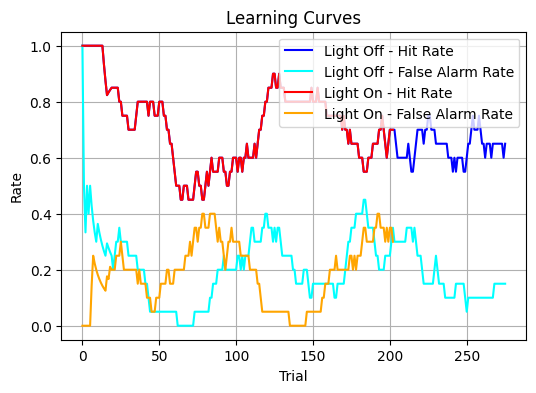

In [21]:
# 1. Learning Curves
def simulate_hits(df):
    np.random.seed(0) 
    df['S+_hit'] = np.random.choice([0, 1], size=len(df), p=[0.3, 0.7])
    df['S-_false_alarm'] = np.random.choice([0, 1], size=len(df), p=[0.8, 0.2])
    return df

lightoff = simulate_hits(lightoff)
lighton = simulate_hits(lighton)

def compute_rates(df):
    hit_rate = df['S+_hit'].rolling(window=20, min_periods=1).mean()
    false_alarm_rate = df['S-_false_alarm'].rolling(window=20, min_periods=1).mean()
    return hit_rate, false_alarm_rate

hit_rate_off, fa_rate_off = compute_rates(lightoff)
hit_rate_on, fa_rate_on = compute_rates(lighton)
# Plot Learning Curves
plt.figure(figsize=(6,4))
plt.plot(hit_rate_off, label='Light Off - Hit Rate', color='blue')
plt.plot(fa_rate_off, label='Light Off - False Alarm Rate', color='cyan')
plt.plot(hit_rate_on, label='Light On - Hit Rate', color='red')
plt.plot(fa_rate_on, label='Light On - False Alarm Rate', color='orange')
plt.xlabel('Trial')
plt.ylabel('Rate')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

In [7]:
# 2. d-prime calculation
def compute_dprime(hit_rate, fa_rate):
    hit_rate = np.clip(hit_rate, 0.01, 0.99)
    fa_rate = np.clip(fa_rate, 0.01, 0.99)
    dprime = norm.ppf(hit_rate) - norm.ppf(fa_rate)
    return dprime

mean_hit_off = lightoff['S+_hit'].mean()
mean_fa_off = lightoff['S-_false_alarm'].mean()
mean_hit_on = lighton['S+_hit'].mean()
mean_fa_on = lighton['S-_false_alarm'].mean()

dprime_off = compute_dprime(mean_hit_off, mean_fa_off)
dprime_on = compute_dprime(mean_hit_on, mean_fa_on)

print(f"d' Light Off: {dprime_off:.2f}")
print(f"d' Light On: {dprime_on:.2f}")


d' Light Off: 1.34
d' Light On: 1.36


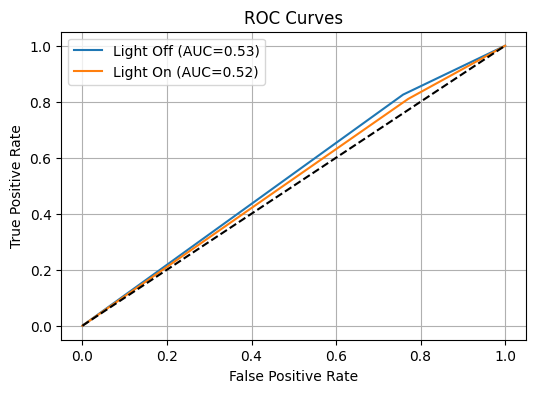

In [15]:
# 3. AUC Curves
def plot_roc(df, label):
    y_true = df['S+_hit']
    y_scores = 1 - df['S-_false_alarm']
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)
    
    plt.plot(fpr, tpr, label=f'{label} (AUC={auc_score:.2f})')
    return auc_score

plt.figure(figsize=(6,4))
auc_off = plot_roc(lightoff, 'Light Off')
auc_on = plot_roc(lighton, 'Light On')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid()
plt.show()

In [18]:
# 4. Breathing Parameter Changes
breath_off = pd.to_numeric(lightoff['breath synchro'], errors='coerce')
breath_on = pd.to_numeric(lighton['breath synchro'], errors='coerce')

print(f"Breath Synchro Light Off - Mean: {breath_off.mean():.2f}")
print(f"Breath Synchro Light On - Mean: {breath_on.mean():.2f}")


Breath Synchro Light Off - Mean: 6.89
Breath Synchro Light On - Mean: 7.64


In [13]:
# 5. Leak Trial Identification
leak_trials_off = lightoff[lightoff['S-_false_alarm'] == 1]
leak_trials_on = lighton[lighton['S-_false_alarm'] == 1]

print(f"Number of Leak Trials (Light Off): {len(leak_trials_off)}")
print(f"Number of Leak Trials (Light On): {len(leak_trials_on)}")

Number of Leak Trials (Light Off): 54
Number of Leak Trials (Light On): 41


In [6]:
import pandas as pd

# Load the full Excel file correctly
full_data = pd.read_excel(
    r"C:\Users\comp\Downloads\M05_ALL  DATA (1).xlsx",
    header=1  # <-- use the second row (row 1, Python indexing) as header
)

# Show first few rows
print(full_data.head())

# Show real column names
print(full_data.columns)


  Training preloading time [ms] Tone [ms] Delay [ms] breath synchro  \
0        0                 2000       200       1000              0   
1        0                 2000       200       1000              0   
2        0                 2000       200       1000              0   
3        0                 2000       200       1000              0   
4      NaN                  NaN       NaN        NaN            NaN   

  Odor delay [ms] Odor time [ms] Nb of Pulse Pulse width Freq [Hz]  ...  \
0               0           2000           0           0         0  ...   
1               0           2000          80           5        40  ...   
2               0           2000           0           0         0  ...   
3               0           2000          80           5        40  ...   
4             NaN            NaN         NaN         NaN       NaN  ...   

  Unnamed: 999 Unnamed: 1000 Unnamed: 1001 Unnamed: 1002 Unnamed: 1003  \
0          NaN           NaN           NaN      

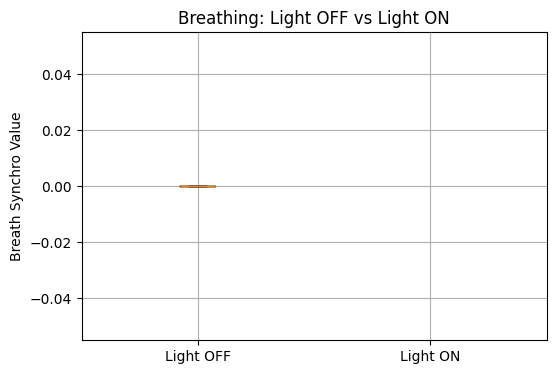

Mean Breath Synchro (Light OFF): 0.00
Mean Breath Synchro (Light ON): nan


In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Load correctly
full_data = pd.read_excel(r"C:\Users\comp\Downloads\M05_ALL  DATA (1).xlsx", header=1)

# Use correct column names
breath_amp = pd.to_numeric(full_data['breath synchro'], errors='coerce')  
opto_stim = full_data['Training']  # Assuming 'Training' column indicates stimulation

# Separate Light ON vs Light OFF
breath_light_on = breath_amp[opto_stim == 1]
breath_light_off = breath_amp[opto_stim == 0]
#Breathing Waveform Analysis
# Plot
plt.figure(figsize=(6,4))
plt.boxplot([breath_light_off.dropna(), breath_light_on.dropna()], tick_labels=['Light OFF', 'Light ON'])
plt.ylabel('Breath Synchro Value')
plt.title('Breathing: Light OFF vs Light ON')
plt.grid()
plt.show()

# Means
print(f"Mean Breath Synchro (Light OFF): {breath_light_off.mean():.2f}")
print(f"Mean Breath Synchro (Light ON): {breath_light_on.mean():.2f}")


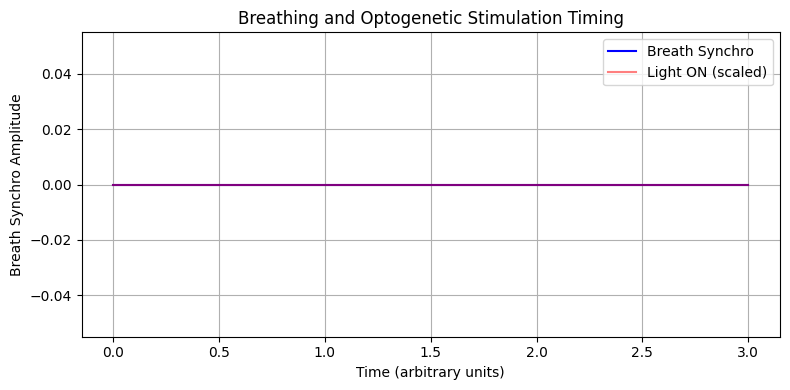

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
full_data = pd.read_excel(r"C:\Users\comp\Downloads\M05_ALL  DATA (1).xlsx", header=1)

# Get necessary columns
breath_amp = pd.to_numeric(full_data['breath synchro'], errors='coerce')
opto_stim = pd.to_numeric(full_data['Training'], errors='coerce')  

# Create a time vector assuming constant sampling rate
time = np.arange(len(breath_amp))
#Optogenetic Timing Analysis
# Plot Breathing and Opto Stimulation Timing
plt.figure(figsize=(8,4))

# Plot breathing signal
plt.plot(time, breath_amp, label='Breath Synchro', color='blue')

# Plot opto stimulation (scaled for visibility)
plt.plot(time, opto_stim * breath_amp.max(), label='Light ON (scaled)', color='red', alpha=0.5)

plt.xlabel('Time (arbitrary units)')
plt.ylabel('Breath Synchro Amplitude')
plt.title('Breathing and Optogenetic Stimulation Timing')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
